In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from pandas import Series
import seaborn as sns
from numpy.random import randn
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import pickle
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

In [ ]:
pbp = pd.read_csv('/Users/lauren/Downloads/epa_plays.csv', index_col=0)
pbp

In [ ]:
pbp.isnull().values.any()
#Taking out the rows that a play did not occur in.
pbp = pbp[pbp.no_play != 1]
pbp

In [ ]:
for col in pbp.columns:
    print(col)

In [ ]:
pbp2 = pbp[['quarter', 'down', 'distance', 'yards_to_go', 'play_type', 'regular_play_type', 'seconds_left_in_quarter']]
pbp2

In [ ]:
pbp2.loc[pbp2['play_type'] != 'S']

Random Forest Classifier

In [ ]:
pbp2 = pbp2.dropna(how='any',axis=0) 
pbp2.notnull() == True

In [8]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(max_features='auto', n_jobs=1)

In [9]:
clf=RandomForestClassifier(n_estimators=100)

In [10]:
X=pbp2[['quarter', 'down', 'distance', 'yards_to_go', 'seconds_left_in_quarter']]
y=pbp2['regular_play_type']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(" Random Forest Accuracy:",metrics.accuracy_score(y_test, y_pred))

 Random Forest Accuracy: 0.6321181446979144


In [13]:
feature_imp = pd.Series(clf.feature_importances_,index=['quarter', 'down', 'distance', 'yards_to_go', 'seconds_left_in_quarter']).sort_values(ascending=False)
feature_imp

seconds_left_in_quarter    0.573818
yards_to_go                0.226317
distance                   0.095963
down                       0.074707
quarter                    0.029194
dtype: float64

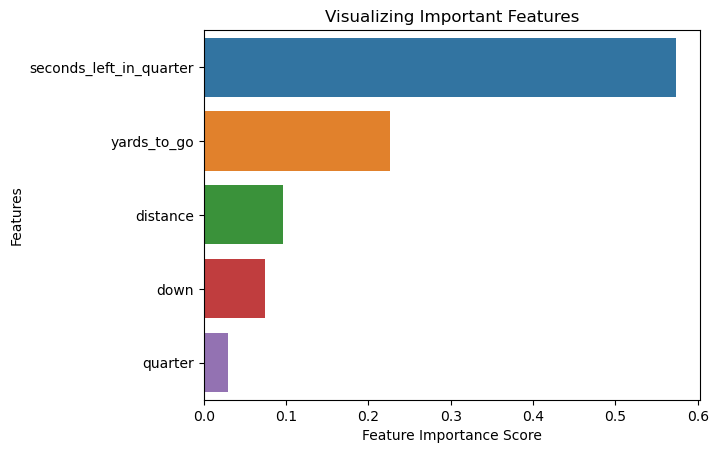

In [14]:
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [15]:
# Provide feature names when making predictions
feature_names = X.columns
new_data = pd.DataFrame([[2, 1, 5, 43, 800], [4, 4, 1, 1, 10], [3, 2, 15, 67, 500]], columns=feature_names)

# Predict using the trained model and feature names
predictions = clf.predict(new_data)

print("Predictions:", predictions)

Predictions: ['R' 'P' 'P']


KNN

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.6035477640040099


Logistic Regression

In [17]:
# Apply data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test_scaled)

# Calculate and print the accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.6374911367026088


Naive Bayes

In [18]:
# Label encoding for target variable y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model to the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_model.predict(X_test)

# Calculate and print the accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)

Naive Bayes Accuracy: 0.6292635516760801


XGBoost

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Label encoding for target variable y
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Create an XGBoost classifier
clf = XGBClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate and print the accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", accuracy)

XGBoost Accuracy: 0.6718990684368811


Saving the XGBoost Model

In [20]:
# Save the model to a file
with open('xgboost_model.pickle', 'wb') as f:
    pickle.dump(clf, f)

# Load the saved model
with open('xgboost_model.pickle', 'rb') as f:
    loaded_model = pickle.load(f)

# Now you can use the loaded_model for predictions without retraining
y_pred_loaded = loaded_model.predict(X_test)
print(y_pred_loaded)

[1 0 0 ... 1 1 1]


Creating the App

In [25]:
# Get the column names in the same order as the training data
user_input_cols = X_train.columns.tolist()

# Function to get the user's input and make predictions
def get_user_input():
    # Getting user input
    quarter = int(input("Enter the quarter: "))
    down = int(input("Enter the down: "))
    distance = int(input("Enter the distance: "))
    yards_to_go = int(input("Enter the yards to go: "))
    seconds_left_in_quarter = int(input("Enter the seconds left in quarter: "))

    # Making a prediction using the loaded model
    user_input = [[quarter, down, distance, yards_to_go, seconds_left_in_quarter]]

    # Create a DataFrame with user input and use it for prediction
    user_input_df = pd.DataFrame(user_input, columns=user_input_cols)
    prediction = loaded_model.predict(user_input_df)[0]

    # Reversing label encoding
    #prediction = label_encoder.inverse_transform([prediction])[0]

    # Returning prediction as the output
    return prediction

if __name__ == '__main__':
    # Getting the user input to make predictions
    result = get_user_input()

    # Printing the output
    print("Model Prediction:", result)


Enter the quarter: 4
Enter the down: 3
Enter the distance: 10
Enter the yards to go: 25
Enter the seconds left in quarter: 4
Model Prediction: 0
